<a href="https://colab.research.google.com/github/MarlonSerrano/Estudo-de-classifica-o_de_fraude/blob/main/Projetos_de_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Bibliotecas uitlizadas

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
# Bibliotecas de modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Biblioteca de preprocessamento
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer,StandardScaler
# Biblioteca de analise de resultados
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report

## Carregamento dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Meus Projetos/card_transdata.csv')

## Análise Exploratoria dos dados

In [ ]:
df.head(20)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.shape # Visualização das dimensões

(1000000, 8)

In [ ]:
df.dtypes # Tipos de dados 

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [ ]:
df.info() # Verificando se existe dados faltantes na base de dados ou nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


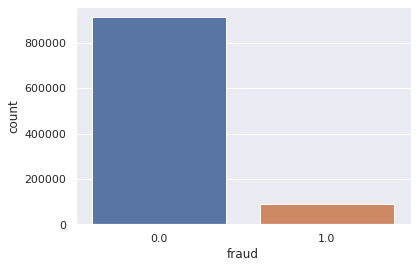

In [ ]:

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="fraud", data=df) # Existe um peso maior nas variáveis que não indicam fraude,
                                       # Logo os dados estam desproporcionais 

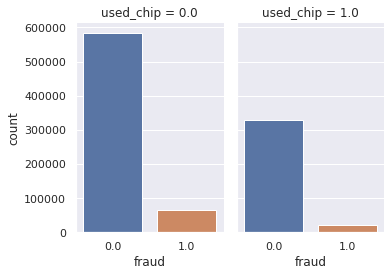

In [ ]:
sns.catplot(x="fraud", col="used_chip",   # ao comparar se a pessoa faz transação com chip, percebesse que o fato de não usar
                data=df, kind="count",    # pode ser um indicio de fraude.
                height=4, aspect=.7)

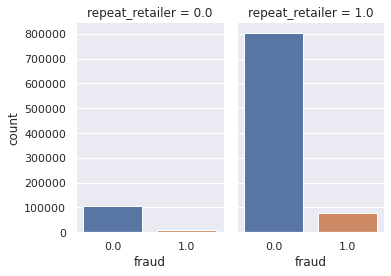

In [ ]:
sns.catplot(x="fraud", col="repeat_retailer",   
                data=df, kind="count",    
                height=4, aspect=.7)
# Ao comparar se foi feito transação do mesmo varejista o forte indicios de fraude.

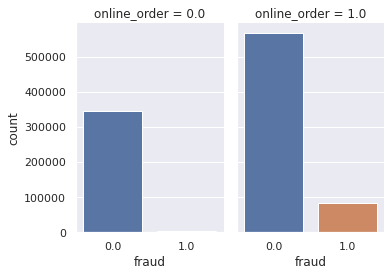

In [ ]:
sns.catplot(x="fraud", col="online_order",   
                data=df, kind="count",    
                height=4, aspect=.7)

# Ao verrificar se a ordem de pagamento foi feito online, concluisse que a maior indicios de fraude quando feito ordens online.

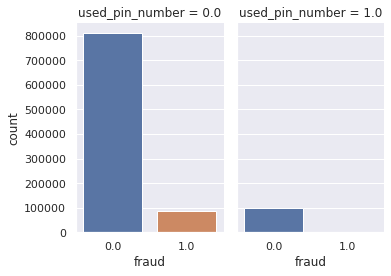

In [ ]:
sns.catplot(x="fraud", col="used_pin_number",   
                data=df, kind="count",    
                height=4, aspect=.7)

# Quando o usuário utiliza seu codigo pin o mesmo não entra na categoria de cartão fraudulento

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


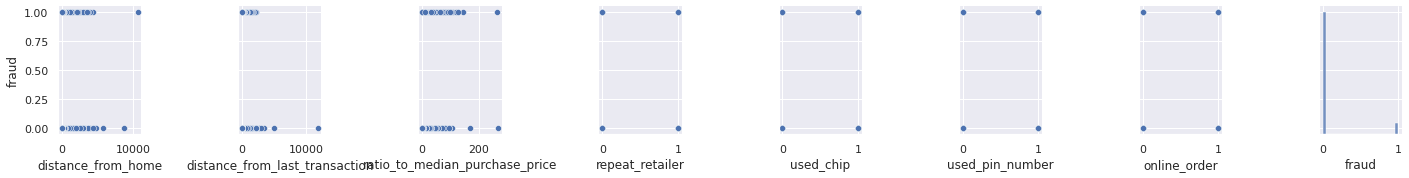

In [ ]:
sns.pairplot(data=df,y_vars='fraud')

# Mostra a relação da variável dependente com as outras variáveis

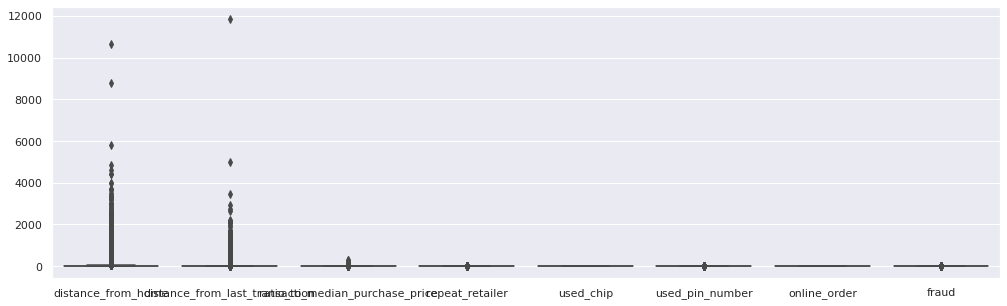

In [ ]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.boxplot(data=df,orient='v',dodge=5)
# Valores com muito outliers 

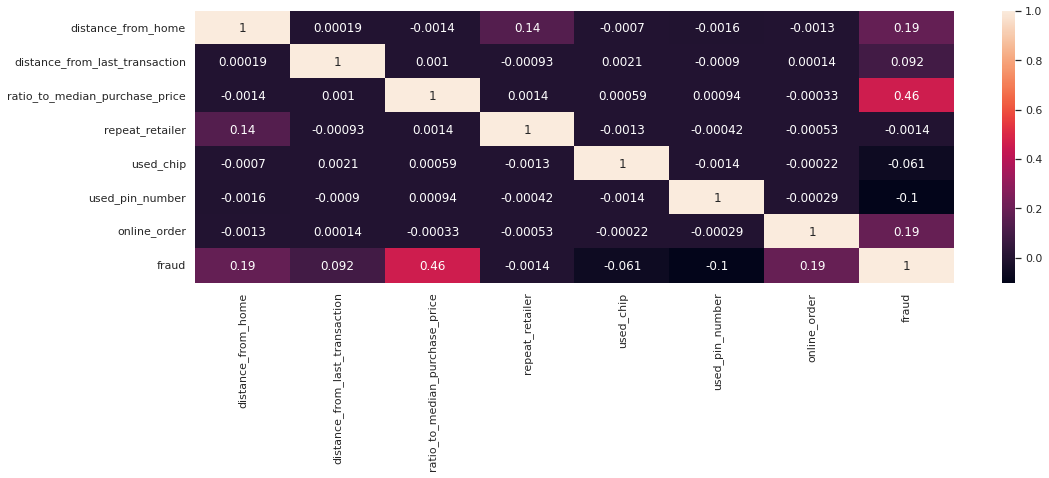

In [ ]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.heatmap(df.corr(), annot=True)
# Tabela de correlação entre as variáveis 

## Pre processamento dos dados

In [ ]:
# Selecionar somente o valores
array = df.values

In [ ]:
# Separar os dados em x e y
x = array[:,0:7]
y = array[:,7]

In [ ]:
# chama a função smote
smt = SMOTE()

In [ ]:
# Oversampling = Balancear utilizando os registros positvos
x,y = smt.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


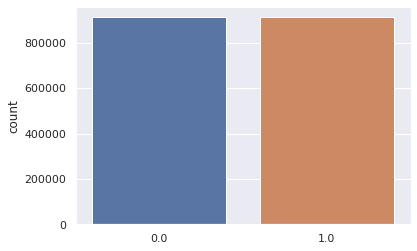

In [ ]:
# Novo balanceamento dos dados 
sns.countplot(y)

In [ ]:
# Normalizar os dados para que tenha comprimento igual a 1
normalizar = Normalizer().fit(x)
x_2 = normalizar.transform(x)

In [ ]:
x_2

array([[0.99912298, 0.00537109, 0.03359201, ..., 0.01726261, 0.        ,
        0.        ],
       [0.98866079, 0.01602967, 0.11814868, ..., 0.        , 0.        ,
        0.        ],
       [0.94948625, 0.15016095, 0.07976876, ..., 0.        , 0.        ,
        0.18649999],
       ...,
       [0.99846946, 0.00257196, 0.0527062 , ..., 0.        , 0.        ,
        0.01170872],
       [0.9996701 , 0.00251153, 0.02249345, ..., 0.        , 0.        ,
        0.00858588],
       [0.02805191, 0.0295151 , 0.9959839 , ..., 0.05638275, 0.        ,
        0.05638275]])

In [ ]:
padronizar = StandardScaler()
x_3 = padronizar.fit_transform(x)
x_3

array([[ 0.13000041, -0.21799579, -0.3727355 , ...,  1.52479964,
        -0.24490325, -1.92521108],
       [-0.32867575, -0.22160896, -0.51183841, ..., -0.67059273,
        -0.24490325, -1.92521108],
       [-0.38462466, -0.20482742, -0.69678446, ..., -0.67059273,
        -0.24490325,  0.52610859],
       ...,
       [ 0.39710563, -0.22043422,  0.1727105 , ..., -0.67059273,
        -0.24490325,  0.52610859],
       [ 0.70085051, -0.21849216, -0.22890353, ..., -0.67059273,
        -0.24490325,  0.52610859],
       [-0.4294078 , -0.21233574,  2.9822638 , ...,  1.52479964,
        -0.24490325,  0.52610859]])

# Avaliando a performance do modelos

In [ ]:
# Modelos do KNN que o metodo que aprende baseado em instãncias
modelo_1 =  KNeighborsClassifier()
# Modelo Logit 
modelo_2 = LogisticRegression()

In [ ]:
# Numeros de folds
num_folds = 5
num_instances = len(x_2)
seed = 7

In [ ]:
# definindo o numero de folds
kfold = model_selection.KFold(n_splits=num_folds,shuffle=True,random_state=seed)

In [ ]:
# Criando o modelo
resultado_1 = model_selection.cross_val_score(modelo_1, x_2, y, cv = kfold)

# Print do resultado do modelo KNN
print(resultado_1.mean())

0.9916239040299539


In [ ]:
# Criando o modelo
resultado_2 = model_selection.cross_val_score(modelo_2, x_2, y, cv = kfold)

# Print do resultado Logit
print(resultado_2.mean())

0.8636753133897569


In [ ]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x_2, y, test_size=0.30, random_state=42)

In [ ]:
# KNN
modelo_Knn = modelo_1.fit(X_train,y_train)

In [ ]:
# KNN
previsao = modelo_Knn.predict(X_test)

In [ ]:
# KNN 
print(classification_report(y_test,previsao))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    273947
         1.0       0.98      1.00      0.99    273612

    accuracy                           0.99    547559
   macro avg       0.99      0.99      0.99    547559
weighted avg       0.99      0.99      0.99    547559



In [ ]:
# Logit
modelo_Logit = modelo_2.fit(X_train,y_train)
previsao_2 = modelo_Logit.predict(X_test)

In [ ]:
# Logit
print(classification_report(y_test,previsao_2))

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85    273947
         1.0       0.81      0.94      0.87    273612

    accuracy                           0.86    547559
   macro avg       0.87      0.86      0.86    547559
weighted avg       0.87      0.86      0.86    547559



In [ ]:
# Separando os dados em treino e teste com dados padronizados que o modelo logit espera receber
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x_3, y, test_size=0.30, random_state=42)

In [ ]:
modelo_Logit_p = modelo_2.fit(X_train_p,y_train_p)
previsao_3 = modelo_Logit_p.predict(X_test_p)

In [ ]:
# Logit
print(classification_report(y_test_p,previsao_3))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    273947
         1.0       0.93      0.95      0.94    273612

    accuracy                           0.94    547559
   macro avg       0.94      0.94      0.94    547559
weighted avg       0.94      0.94      0.94    547559

